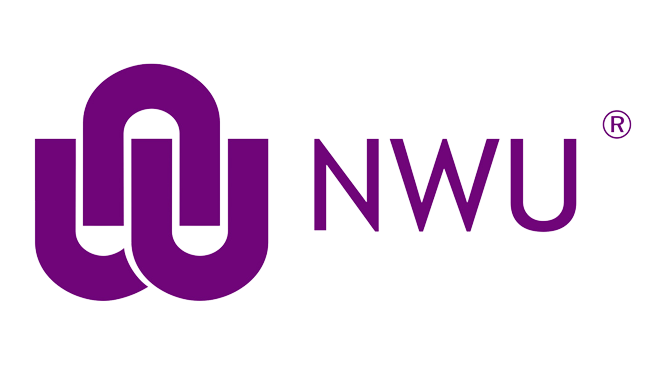

# **CISM 623: Machine Learning**

# **Student Details**

*   # Student Name and Surname: Rorisang Prince Seiso
*   # University Number: 32577443


# Practical Lab 1

# CLASS: B.Sc Computer Science (HONS)

# DUE DATE: 11/ 08/ 2025 (Monday)


# Instructions: Answer all Questions


# **Problem Statement**
## The world population data spans from 1960 to 2017. We want to develop a prediction model that can provide the most accurate estimation of the current or historical population of a specific nation. Use the two CSV files to answer the questions.

# **Question 1**
## Create a function that accepts a **`country name`** as input and returns a dataframe with the `measured population` and the `year`.

In [328]:
import pandas as pd

def year_population(name_of_country):
    # load the datasets
    countries = pd.read_csv('countries.csv')
    population = pd.read_csv('world_population.csv')

    # Add country names to population data
    population_with_names = population.copy()
    population_with_names['Country_Name'] = countries[countries.columns[0]]
    
    # Filter for the requested country 
    country_data = population_with_names[population_with_names['Country_Name'] == name_of_country]
    
    # Create result DataFrame
    df = pd.DataFrame(columns=[ 'Population', 'Year'])
    
    # Get all year columns 
    years = [str(y) for y in range(1960, 2018)]
    
    # Add data to the DataFrame
    for year in years:
        if year in country_data.columns:
            df.loc[len(df)] = [country_data[year].values[0], int(year)]
    
    return df

In [329]:
data = year_population('Angola')
print(data.head())

   Population    Year
0   5643182.0  1960.0
1   5753024.0  1961.0
2   5866061.0  1962.0
3   5980417.0  1963.0
4   6093321.0  1964.0


# **Question 2**
## We must first divide our data into predictive features (X) and the target (y) before dividing it into training and testing.

## ----------------------------------------------------------------------------------------------------------------------------------------------

## Write a function that will take a dataframe as input `(Question 1)` and return four variables in the form of `(X_train, y_train), (X_test, y_test)` which you will use to train and evaluate your model
## ----------------------------------------------------------------------------------------------------------------------------------------------

## `test_size = 0.2` and `random_state = 42`.

_**Use the results in Question 1 as Inputs:**_
```python
data = get_year_pop('Aruba')
data_split(data)
```
>

In [330]:
from sklearn.model_selection import train_test_split

def data_split(df):
    #Features
    x = df[['Year']]
    y = df['Population']

    #Now split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2, random_state = 42)
    
    return (x_train, y_train), (x_test,  y_test)


In [331]:
data = year_population('Aruba')  # Using your Q1 function
train_set, test_set = data_split(data)

x_train, y_train = train_set
x_test, y_test = test_set


#Concatinate data
train_set = pd.concat([x_train,y_train], axis= 1)
test_set = pd.concat([x_test, y_test], axis= 1)

print("Train set: \n", train_set.head())
print("Test set: \n", test_set.head())



Train set: 
       Year  Population
36  1996.0     83200.0
31  1991.0     64622.0
8   1968.0     58386.0
17  1977.0     60366.0
6   1966.0     57715.0
Test set: 
       Year  Population
0   1960.0     54211.0
5   1965.0     57360.0
34  1994.0     76700.0
13  1973.0     60243.0
44  2004.0     98737.0


# **Question 3**
## Use the output from `data_split(df)` to fit a Linear regression model

In [332]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(x_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


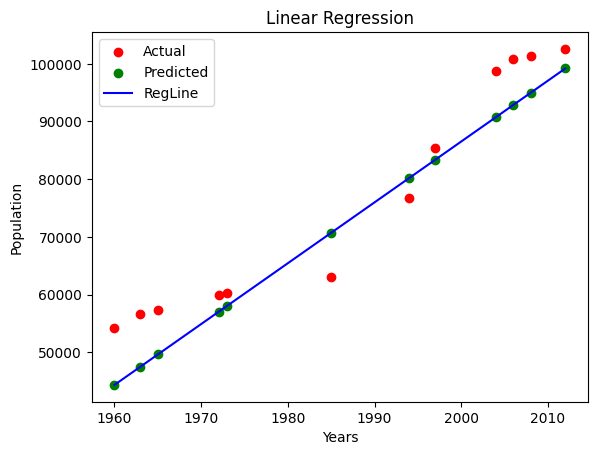

In [333]:
y_predi = model.predict(x_test)

#Scatter plot
plt.scatter(x_test, y_test, color = 'red', label = 'Actual')
plt.scatter(x_test, y_predi, color = 'green', label = 'Predicted')

x_sorted = x_test.sort_values (by = 'Year')
plt.plot(x_sorted, model.predict(x_sorted), color = 'blue', label = 'RegLine')

plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Linear Regression')
plt.legend()
plt.show()

# **Question 4**
Test your model using the testing data that was produced in Question 2. To use the `mean square error` as your performance metric.

Write a function that accepts the `model` in Question 3, and the `test data set` in Question 2

In [354]:
from sklearn.metrics import mean_squared_error, r2_score

def test_model(model, x_test, y_test, x_train, y_train):
    
    mse_test = mean_squared_error(y_test, y_predi)
    r_2_test = r2_score(y_test, y_predi)
    print("r2= ", r_2_test)

    
    y_train_predi = model.predict(x_train)
    mse_train = mean_squared_error(y_train,y_train_predi) 

    return mse_test, mse_train

In [355]:
mse_test, mse_train = test_model(model, x_test, y_test, x_train, y_train)
print("TEST DATA MSE: " , mse_test)
print("Train Data MSE: ", mse_train)


r2=  0.8852462614197492
TEST DATA MSE:  42488189.31634962
Train Data MSE:  45383295.28436149
